
Pairwise Correlations (Selected Data Points):
Correlation between s1 and s2: 0.0599
Correlation between s1 and s3: 1.0000
Correlation between s2 and s3: 0.0599

Normalized Data from data point 0 to 1007
   data_point        s1       s2        s3
0           0  1.000000  2.00000  0.700000
1           1  1.010000  1.99995  0.707000
2           2  1.019999  1.99980  0.713999
3           3  1.029996  1.99955  0.720997
4           4  1.039989  1.99920  0.727993
Total rows: 1008


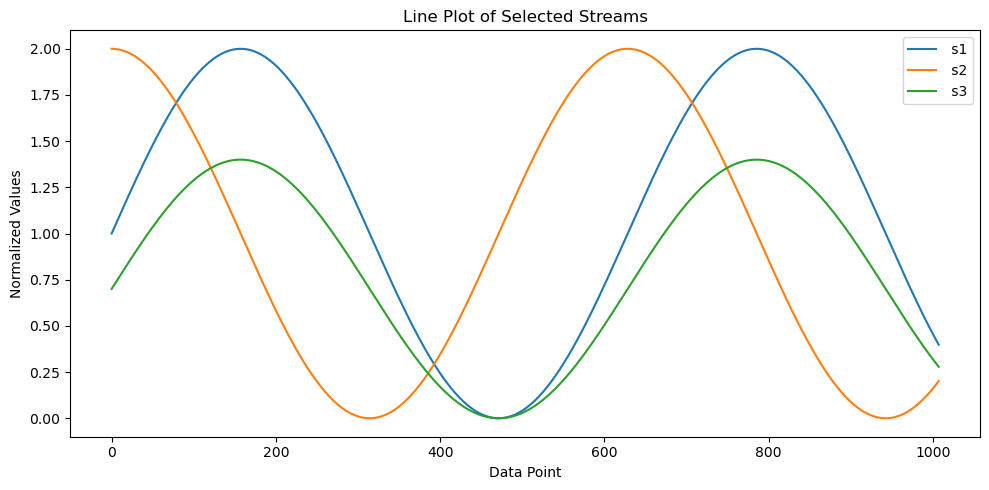

In [1]:
from correlation import calculate_pairwise_correlation
from data_loader import load_data
from gui_setup import setup_gui
from normalization import normalize_data
from plotting import plot_data

def process_callback(start_spinbox, end_spinbox, stream_vars, plot_type):
    """
    Handles GUI input when the 'Display' button is clicked.
    Extracts the selected data point range and streams, normalizes the data,
    computes correlations, and plots the result.

    Parameters:
        start_spinbox (ttk.Spinbox): Widget for selecting the start data point.
        end_spinbox (ttk.Spinbox): Widget for selecting the end data point.
        stream_vars (dict): Dictionary mapping stream names to their BooleanVar selection.
        plot_type (tk.StringVar): Selected plot type ('line' or 'box').
    """
    try:
        # Get user input from spinboxes and convert to integers
        start_dp = int(start_spinbox.get())
        end_dp = int(end_spinbox.get())
    except ValueError:
        print("Please enter valid integer values for the data point range.")
        return

    # Ensure the start point is less than the end point
    if start_dp >= end_dp:
        print("Start data point must be less than end data point.")
        return

    # Filter the DataFrame based on selected data point range
    df_filtered = df_raw[(df_raw["data_point"] >= start_dp) & (df_raw["data_point"] <= end_dp)]

    # Build a list of selected columns (time + checked sensor streams)
    selected_columns = ["data_point"] + [col for col, var in stream_vars.items() if var.get()]
    df_selected = df_filtered[selected_columns]

    # Normalize and interpolate the selected data
    final_df = normalize_data(df_selected, time_col="data_point")

    # Print pairwise correlation among selected streams
    calculate_pairwise_correlation(final_df, time_col="data_point")

    # Debug: Show preview of the normalized data
    print(f"\nNormalized Data from data point {start_dp} to {end_dp}")
    print(final_df.head())
    print(f"Total rows: {len(final_df)}")

    # Plot the data
    plot_data(final_df, plot_type.get(), time_col="data_point")


# Entry Point
if __name__ == "__main__":
    # Load the dataset from a file (change filename to test other datasets)
    df_raw, min_dp, max_dp, time_col = load_data("simple.csv") 

    # Identify all sensor columns (exclude the time/index column)
    sensor_columns = [col for col in df_raw.columns if col != time_col]

    # Launch the GUI
    root = setup_gui(min_dp, max_dp, sensor_columns, process_callback)
    root.mainloop()
